In [1]:
import pandas as pd
index_data = {'Silhouette_Score' : [], 'Calinski_Harabasz_Score' : [], 'Davies_Bouldin_Score' : []}
final_df = pd.DataFrame(index_data)
final_df

,Silhouette_Score,Calinski_Harabasz_Score,Davies_Bouldin_Score


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import numpy as nm    
import matplotlib.pyplot as mtp     
import xlrd
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [4]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

In [5]:
#!pip install xlrd==1.2.0

In [402]:
img = 42
book = xlrd.open_workbook(filename=f'/content/drive/MyDrive/BTP/Result- Part-2/Statistics with feature_eng/image{img}.xls')

dataset = pd.read_excel(book)

print(dataset) 
dataset.shape

     area  equivalent_diameter  mean_intensity-0  orientation   perimeter  \
0     648            28.723844         80.836420    -1.253000  137.775649   
1     964            35.034311         63.024896     1.297141  152.953319   
2    1038            36.354128         72.942197    -1.096501  160.882251   
3    2764            59.323133         81.939942     1.235116  408.960461   
4    2210            53.045824         59.921719    -1.128487  245.800036   
..    ...                  ...               ...          ...         ...   
145  4144            72.638176         69.813465    -1.279733  421.232539   
146  1664            46.029019         69.373798    -1.067999  233.871104   
147  3401            65.804921         69.565716    -1.452130  318.628463   
148  1056            36.667983         79.820076    -1.434093  181.225397   
149   529            25.952721         76.862004    -1.495413  111.633514   

     max_intensity-0  min_intensity-0  major_axis_length  minor_axis_length

(150, 44)

In [403]:
dataset.drop('marker num', axis=1, inplace=True)
print(dataset.shape)

(150, 43)


In [404]:
x = dataset.iloc[:, :].values  

In [405]:
x

array([[6.48000000e+02, 2.87238442e+01, 8.08364198e+01, ...,
        7.66148896e-01, 7.40824242e+00, 3.97561563e-01],
       [9.64000000e+02, 3.50343106e+01, 6.30248963e+01, ...,
        1.80940616e+00, 6.59143802e+00, 6.99225191e-01],
       [1.03800000e+03, 3.63541283e+01, 7.29421965e+01, ...,
        2.59654727e-01, 7.18659308e+00, 7.23729393e-02],
       ...,
       [3.40100000e+03, 6.58049215e+01, 6.95657160e+01, ...,
        6.36913572e+00, 8.82496786e+00, 3.06855962e+00],
       [1.05600000e+03, 3.66679828e+01, 7.98200758e+01, ...,
        2.74271690e+00, 5.92990737e+00, 6.23288658e-01],
       [5.29000000e+02, 2.59527208e+01, 7.68620038e+01, ...,
        3.64613172e-01, 8.50739796e+00, 1.34169378e-01]])

In [406]:
x.shape

(150, 43)

In [407]:
#Standard Scaler
scaler = StandardScaler()
# transform data
scaled = scaler.fit_transform(x)
print(scaled)
x = scaled

[[-1.11561729 -1.42262221  1.22005605 ... -0.6886015   0.36335014
  -0.33230753]
 [-0.94218082 -1.08538177 -1.04516973 ... -0.35613514 -0.03552122
  -0.21455116]
 [-0.90156595 -1.0148488   0.21608814 ... -0.85001161  0.25511177
  -0.45924705]
 ...
 [ 0.39536563  0.55904411 -0.21332436 ...  1.09696442  1.05518186
   0.7103341 ]
 [-0.89168666 -0.99807597  1.09079992 ... -0.05870666 -0.35856751
  -0.24419348]
 [-1.18093039 -1.57071504  0.71459959 ... -0.81656334  0.90010246
  -0.4351244 ]]


In [408]:
#training the K-means model on a dataset  
kmeans = KMeans(n_clusters=2, init='k-means++', random_state= 42)  
y_predict= kmeans.fit_predict(x)  

In [409]:
y_predict

array([0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0], dtype=int32)

In [419]:
y_predict.size

150

In [410]:
nm.sum(y_predict == 0)

79

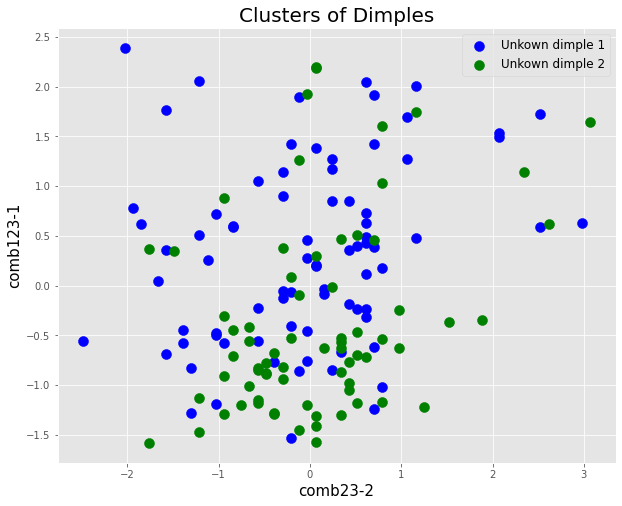

In [411]:
#visulaizing the clusters  
mtp.figure(figsize =(10, 8))
xaxis = 6
yaxis = 9
mtp.scatter(x[y_predict == 0, xaxis], x[y_predict == 0, yaxis], s = 100, c = 'blue', label = 'Unkown dimple 1') #for first cluster  
mtp.scatter(x[y_predict == 1, xaxis], x[y_predict == 1, yaxis], s = 100, c = 'green', label = 'Unkown dimple 2') #for second cluster    
#mtp.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid')   
mtp.title('Clusters of Dimples', fontsize = 20)  
mtp.xlabel(dataset.columns[xaxis + 10], fontsize = 15, color='black')  
mtp.ylabel(dataset.columns[yaxis + 10], fontsize = 15, color='black')  
mtp.rc('legend', fontsize=12)
mtp.legend()  
mtp.show() 

In [412]:
silhouette_scr = silhouette_score(x, y_predict)
print(silhouette_scr)

0.1469228257121038


In [413]:
calinski_harabasz_scr = calinski_harabasz_score(x, y_predict)
print(calinski_harabasz_scr)

26.201902736999042


In [414]:
davies_bouldin_scr = davies_bouldin_score(x, y_predict)
print(davies_bouldin_scr)

2.2318148746924638


In [415]:
y_predict

array([0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0], dtype=int32)

In [416]:
df = pd.DataFrame(x)
x_t = df
df['Cluster'] = y_predict
# print(df['Cluster'].value_counts())
# df['Binary Cluster 0'] = df['Cluster'].map({0:1, 1:0, 9:0})
#print(df['Binary Cluster 0'])
print(df)

            0         1         2         3         4         5         6  \
0   -1.115617 -1.422622  1.220056 -0.912455 -1.263965  1.013146  0.610277   
1   -0.942181 -1.085382 -1.045170  1.946570 -1.136168 -0.893312 -1.029274   
2   -0.901566 -1.014849  0.216088 -0.737000 -1.069406 -0.348610  0.610277   
3    0.045748  0.212648  1.360399  1.877033  1.019429  0.740795  0.701363   
4   -0.258314 -0.122821 -1.439824 -0.772861 -0.354393 -1.438014 -0.847101   
..        ...       ...       ...       ...       ...       ...       ...   
145  0.803161  0.924223 -0.181816 -0.942426  1.122760  1.013146 -0.391671   
146 -0.557986 -0.497809 -0.237732 -0.705046 -0.454835 -0.893312 -0.027326   
147  0.395366  0.559044 -0.213324 -1.135704  0.258827  0.196093 -0.482757   
148 -0.891687 -0.998076  1.090800 -1.115483 -0.898115 -1.438014  0.792450   
149 -1.180930 -1.570715  0.714600 -1.184230 -1.484084 -1.165663  1.156794   

            7         8         9  ...        34        35        36  \
0  

In [417]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(

         random_state = 42)
rf.fit(x, df['Cluster'])
print(rf.feature_importances_)

[0.04508189 0.04937747 0.00829975 0.00562635 0.07823532 0.0053982
 0.00646126 0.08652237 0.02841706 0.02044667 0.01586514 0.03847568
 0.02644026 0.04706521 0.03629309 0.05376265 0.05865989 0.00840196
 0.01497711 0.07610645 0.03361444 0.05140331 0.06112741 0.0033988
 0.01122452 0.00371294 0.00486854 0.0035645  0.01520029 0.00499539
 0.00452466 0.00345233 0.00737357 0.00316037 0.0152297  0.01012278
 0.00789795 0.00869844 0.00827884 0.0028445  0.0047475  0.0136251
 0.00702033]


Index(['m/d_eq', 'gradients ratio', 'circularity', 'comb12-1', 'comb12-2',
       'comb23-1', 'comb23-2', 'comb13-1', 'comb13-2', 'comb123-1',
       'comb123-2', 'comb123-3', 'comb123-4'],
      dtype='object')

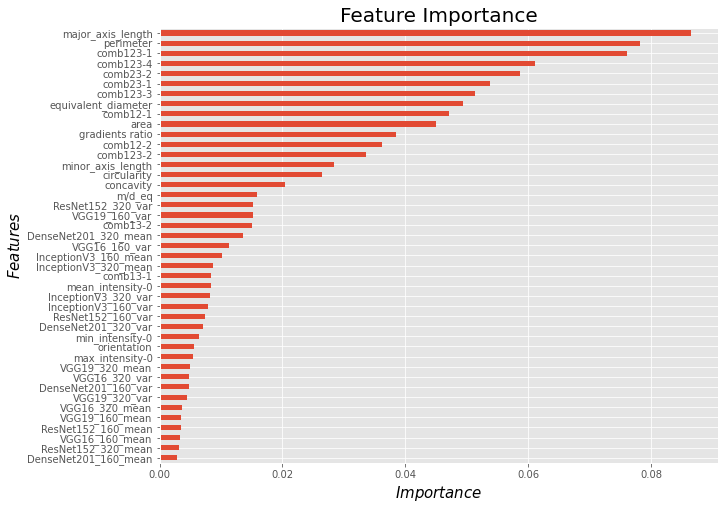

In [418]:
from matplotlib.pyplot import figure
mtp.figure(figsize =(10, 8))
mtp.style.use('ggplot')
feat_importances = pd.Series(rf.feature_importances_, index = dataset.columns[:]).sort_values(ascending = True)
ax = feat_importances.plot(kind = 'barh')
ax.set_xlabel("$ Importance $", fontsize=15, color='black')
ax.set_ylabel("$ Features $", fontsize=15, color='black')
ax.set_title("Feature Importance", size = 20)
dataset.columns[10:23]

In [299]:
# image_dir = f'/content/drive/MyDrive/BTP/Result- Part-2/Plots_Only_Activation/{img}'
# mtp.savefig(f'{image_dir}_2.png')
# from sklearn.inspection import permutation_importance
# result_test = permutation_importance(
#     rf, x, df['Cluster'], n_repeats=20, random_state=42, n_jobs=2
# )

# sorted_importances_idx_test = result_test.importances_mean.argsort()
# importances_test = pd.DataFrame(
#     result_test.importances[sorted_importances_idx_test].T,
#     columns=dataset.columns[sorted_importances_idx_test],
# )
# #f, axs = mtp.subplots(1,2,figsize=(15,5))
# mtp.figure(figsize =(10, 7))
# ax = importances_test.plot.box(vert=False, whis=10)
# ax.set_title("Permutation Importances")
# ax.axvline(x=0, color="k", linestyle="--")
# ax.set_xlabel("Decrease in accuracy score")
# ax.set_ylabel("Features")
# ax.figure.tight_layout()

In [28]:
## from sklearn.ensemble import RandomForestClassifier
# clf = RandomForestClassifier(random_state=1)
# clf.fit(df[[0, 9]].values, df["Binary Cluster 0"].values)

# # Index sort the most important features
# sorted_feature_weight_idxes = nm.argsort(clf.feature_importances_)[::-1] # Reverse sort

# # Get the most important features names and weights
# most_important_features = nm.take_along_axis(
#     nm.array(df.iloc[:, 1:].columns.tolist()), 
#     sorted_feature_weight_idxes, axis=0)
# most_important_weights = nm.take_along_axis(
#     nm.array(clf.feature_importances_), 
#     sorted_feature_weight_idxes, axis=0)

# # Show
# list(zip(most_important_features, most_important_weights))

# # [('Feature1', 0.59), ('Feature2', 0.41)]

In [998]:
final_df

,Silhouette_Score,Calinski_Harabasz_Score,Davies_Bouldin_Score
image20,0.365868,77.264020,1.015339
image21,0.457465,22.395042,0.876696
image22,0.417649,20.806805,0.836153
image23,0.428042,29.274401,1.021267
image24,0.390852,110.575279,0.967204
image25,0.387808,149.154631,0.950829
image26,0.382044,48.835740,0.990580
image27,0.365300,193.593272,1.015368
image28,0.414165,35.172539,0.867791
image29,0.392266,69.543069,0.976578


In [999]:
data = {'Silhouette_Score' : [silhouette_scr], 'Calinski_Harabasz_Score' : [calinski_harabasz_scr], 'Davies_Bouldin_Score' : [davies_bouldin_scr]}
dff = pd.DataFrame(data, index = [f'image{img}'])
final_df = final_df.append(dff)
final_df

,Silhouette_Score,Calinski_Harabasz_Score,Davies_Bouldin_Score
image20,0.365868,77.264020,1.015339
image21,0.457465,22.395042,0.876696
image22,0.417649,20.806805,0.836153
image23,0.428042,29.274401,1.021267
image24,0.390852,110.575279,0.967204
image25,0.387808,149.154631,0.950829
image26,0.382044,48.835740,0.990580
image27,0.365300,193.593272,1.015368
image28,0.414165,35.172539,0.867791
image29,0.392266,69.543069,0.976578


In [1000]:
final_df.to_excel(f'/content/drive/MyDrive/BTP/Result- Part-2/Accuracy Scores Only Feature Engineered/Accuracy.xls', index=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  """Entry point for launching an IPython kernel.
